In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [4]:
# 2. Load the Iris dataset
df = pd.read_csv("Iris.csv")

# Drop ID column if present
df.drop("Id", axis=1, inplace=True)

# Separate features and target
X = df.drop("Species", axis=1)
y = df["Species"]


In [5]:
# 3. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


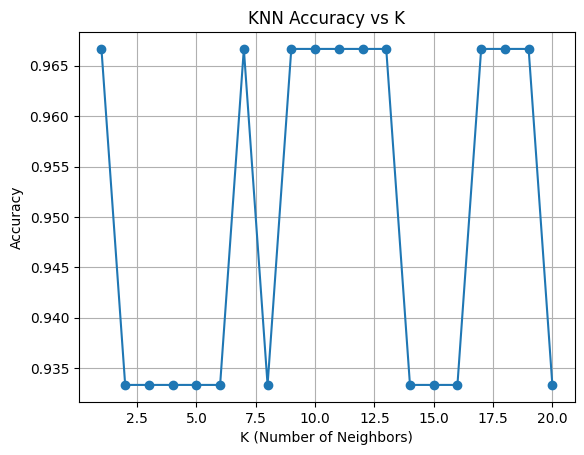

Best K: 1 with accuracy: 0.97


In [6]:
# 4. Train KNN with different K values and store accuracies
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs K
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.grid(True)
plt.show()

# Best K
best_k = k_values[np.argmax(accuracies)]
print(f"Best K: {best_k} with accuracy: {max(accuracies):.2f}")


Final Model Accuracy: 0.9666666666666667


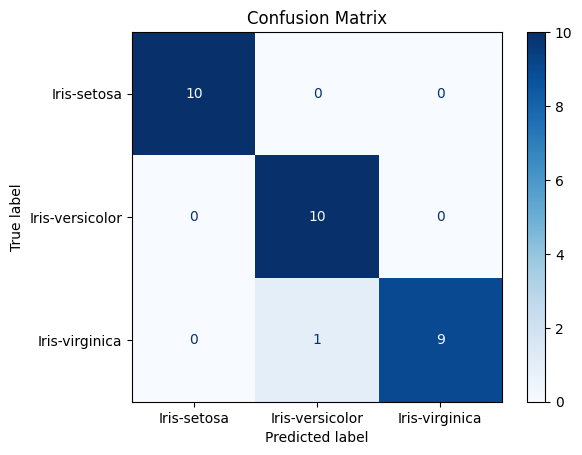

In [7]:
# 5. Train and evaluate final model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
print("Final Model Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

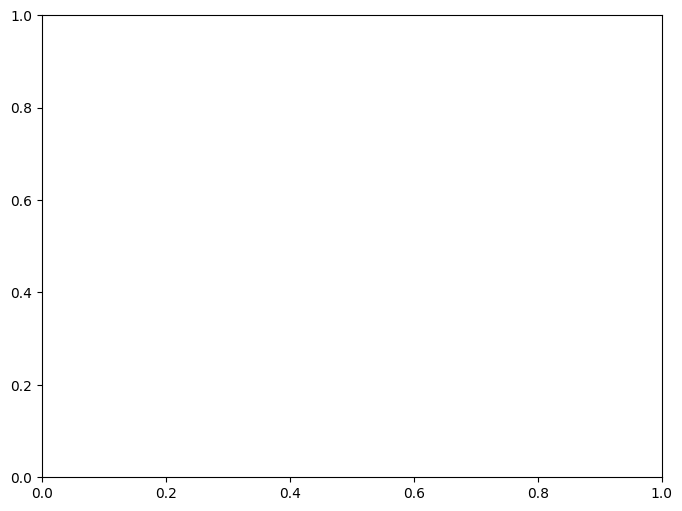

In [8]:
# Use only two features for 2D plot
X_2d = X_scaled[:, [0, 2]]  # Example: sepal length & petal length
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.2, stratify=y, random_state=42)

knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_train_2d)

# Plot decision boundary
from matplotlib.colors import ListedColormap

h = .02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y, palette=cmap_bold, edgecolor='k')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.show()


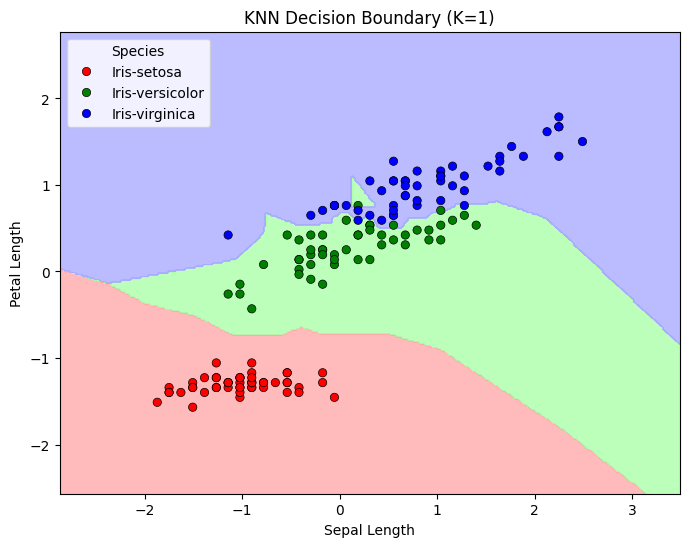

In [9]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
X_2d = X_scaled[:, [0, 2]]  
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.2, stratify=y, random_state=42)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_train_2d_encoded = le.transform(y_train_2d)
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_train_2d)
h = .02
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = le.transform(Z)  # convert to integers
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y, palette=cmap_bold, edgecolor='k')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.show()
